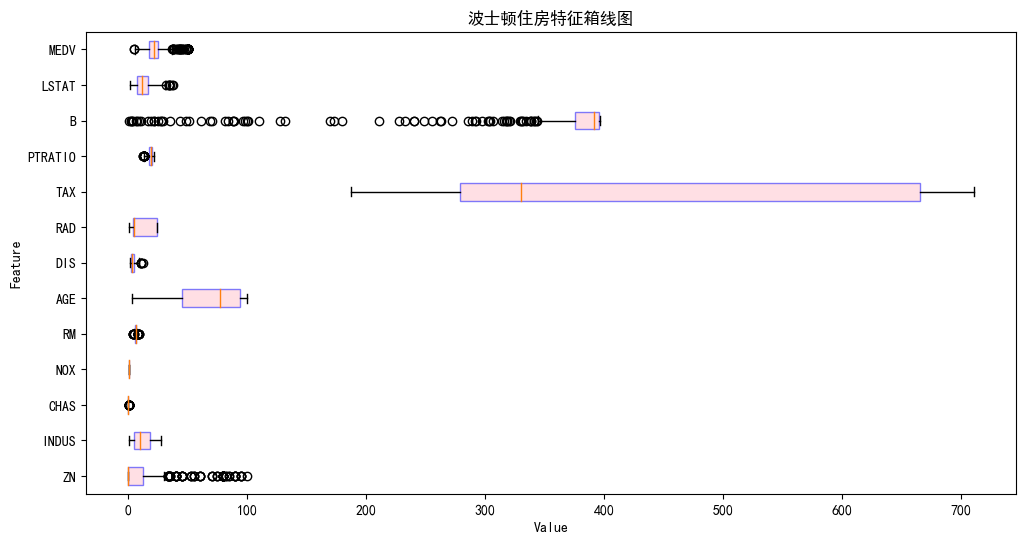

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gmean
import matplotlib.pyplot as plt

# 解决坐标中文、负号乱码情况
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

# 读取波士顿房价数据集
boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')
# 提取特征
features = boston.iloc[:, 1:14]
# 设置图形大小
plt.figure(figsize=(12, 6))
boxprops = {'color': 'blue','facecolor': 'pink','alpha': 0.5}
# 绘制箱线图
plt.boxplot(features.values, vert=False, labels=features.columns,boxprops=boxprops,patch_artist=True)
# 设置图形标题和标签
plt.title('波士顿住房特征箱线图')
plt.xlabel('Value')
plt.ylabel('Feature')
# 显示图形
plt.show()

In [3]:
import pandas as pd
import numpy as np

# 读取波士顿房价数据集
boston = pd.read_csv('D:\code\大三课程\机器学习\实验\实验一\\boston_house_prices.csv')

# 提取特征和目标变量
X = boston.iloc[:, 1:14]
y = boston['MEDV']
# 标识异常值的阈值
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
# 找到包含异常值的行索引
outliers = ((X < (Q1 - threshold)) | (X > (Q3 + threshold))).any(axis=1)
# 删除异常值
cleaned_data = boston[~outliers]
# 重新提取特征和目标变量
X_cleaned = cleaned_data.iloc[:, 1:14]
y_cleaned = cleaned_data['MEDV']




0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 295, dtype: float64

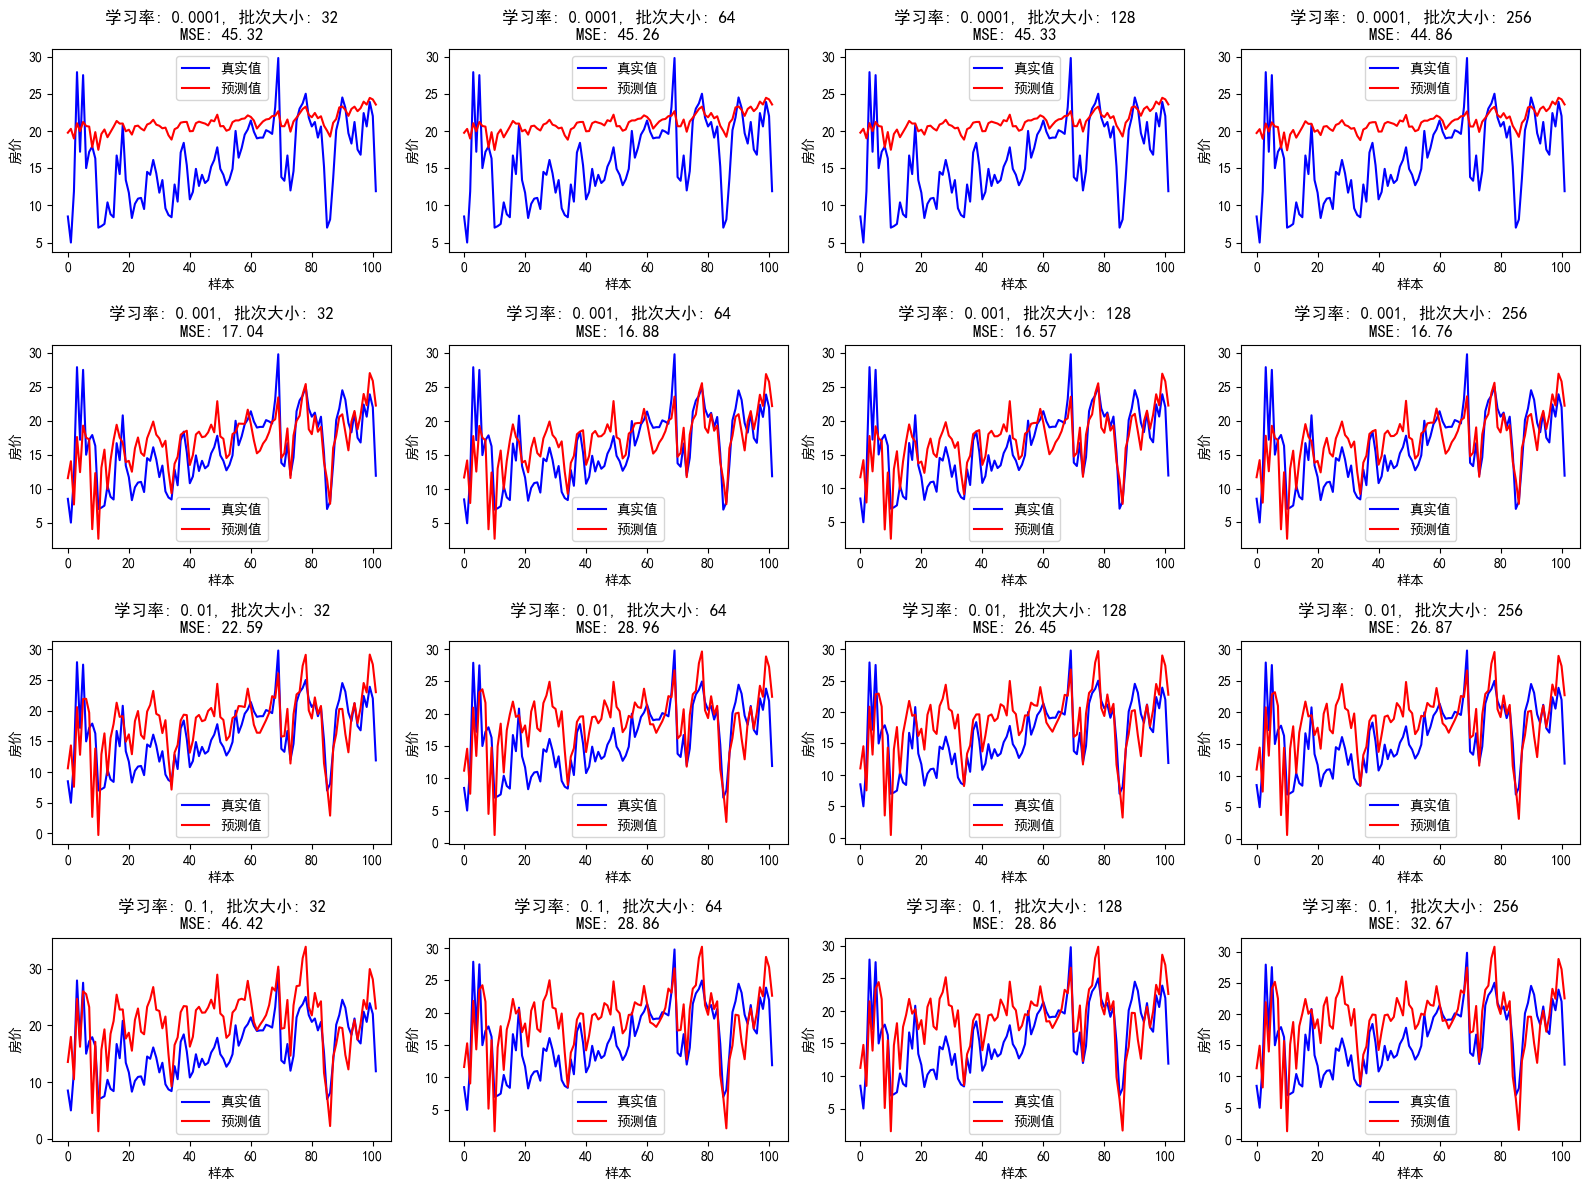

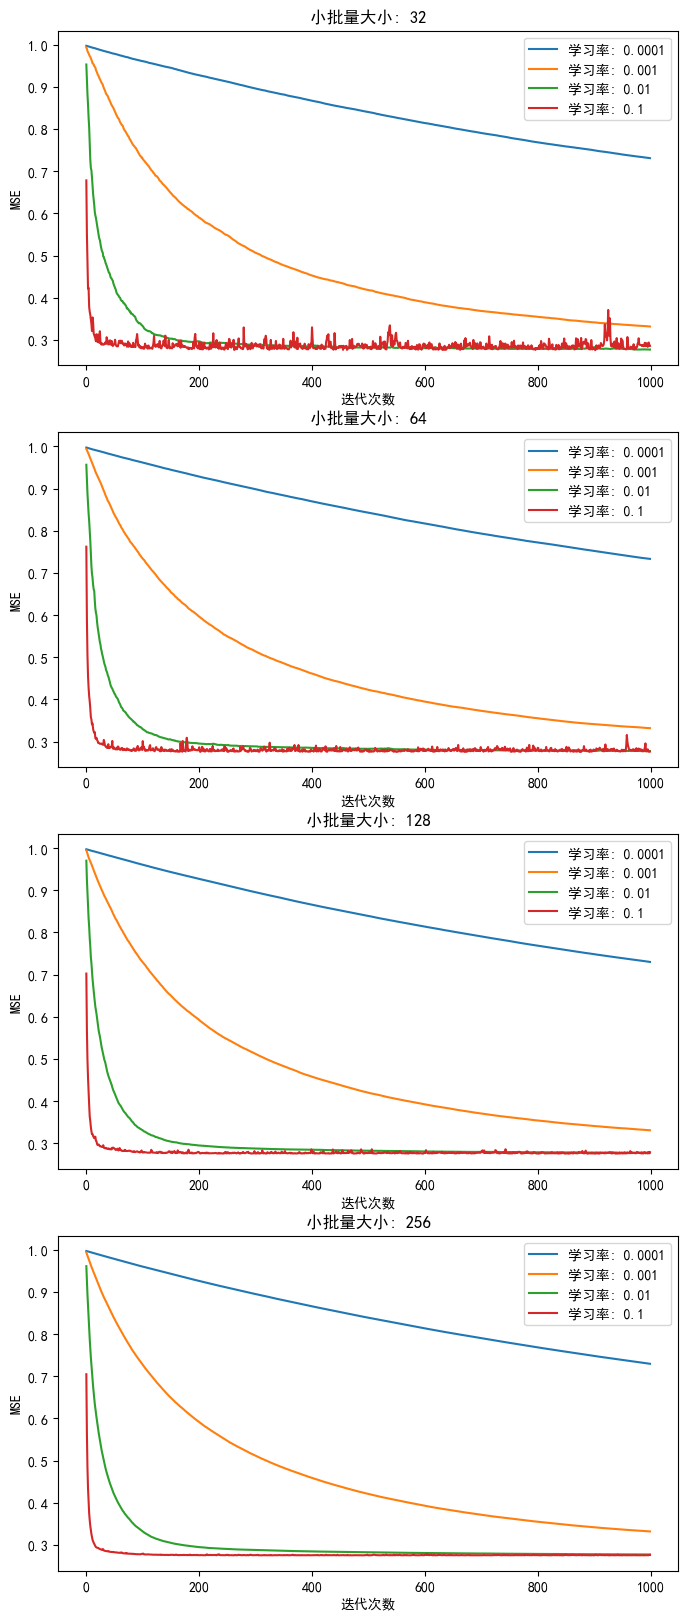

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

# 载入波士顿数据集
boston = pd.read_csv("D:\code\大三课程\机器学习\实验\实验一\实验一\\boston_house_prices.csv")

# 获取特征和标签
X = boston.iloc[:, 1:13]
y = boston['MEDV']

# 计算分割点
split_point = int(0.8 * len(X))

# 手动分割数据
X_train = X.iloc[:split_point, :]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:, :]
y_test = y.iloc[split_point:]

# 标准化数据
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

mean2 = y_train.mean()
std2 = y_train.std()
y_train = (y_train - mean2) / std2

# 小批量梯度下降函数
def mini_batch_gradient_descent(X, y, learning_rate, num_iterations, batch_size):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        # 随机选择小批量样本
        indices = np.random.choice(n_samples, batch_size, replace=False)
        X_batch = X.iloc[indices, :]
        y_batch = y.iloc[indices]

        y_pred = np.dot(X_batch, weights)
        gradient = (1 / batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
        weights -= learning_rate * gradient
        mse = np.mean((np.dot(X, weights) - y) ** 2)  # 计算整个数据集的MSE
        mse_history.append(mse)

    return weights, mse_history

# 不同学习率和批次大小
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128, 256]
num_iterations = 1000

# 创建一个大图，包含四个子图
plt.figure(figsize=(16, 12))

for i, learning_rate in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        # 进行小批量梯度下降
        weights, mse_history = mini_batch_gradient_descent(X_train, y_train, learning_rate, num_iterations, batch_size)

        # 在测试集上进行预测
        y_pred = (np.dot(X_test, weights) * std2) + mean2

        # 计算并显示MSE
        mse = np.mean((y_pred - y_test) ** 2)
        mse_str = f'MSE: {mse:.2f}'

        # 子图的位置（修正）
        plt.subplot(4, 4, i * len(batch_sizes) + j + 1)

        # 绘制测试数据的预测值和真实值的趋势图
        plt.plot(y_test.values, label='真实值', color='blue')
        plt.plot(y_pred, label='预测值', color='red')
        plt.xlabel('样本')
        plt.ylabel('房价')
        plt.title(f'学习率: {learning_rate}, 批次大小: {batch_size}\n{mse_str}')
        plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示大图
plt.show()

# 创建子图
fig, axes = plt.subplots(len(batch_sizes), 1, figsize=(8, 20))
for i, batch_size in enumerate(batch_sizes):
    for learning_rate in learning_rates:
        _, mse_history = mini_batch_gradient_descent(X_train, y_train, learning_rate, num_iterations, batch_size)
        axes[i].plot(range(num_iterations), mse_history, label=f'学习率: {learning_rate}')
    axes[i].set_title(f'小批量大小: {batch_size}')
    axes[i].set_xlabel('迭代次数')
    axes[i].set_ylabel('MSE')
    axes[i].legend()